In [ ]:
Individual_Investor_Complete_Shareholding_Pattern

<Figure size 1200x800 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


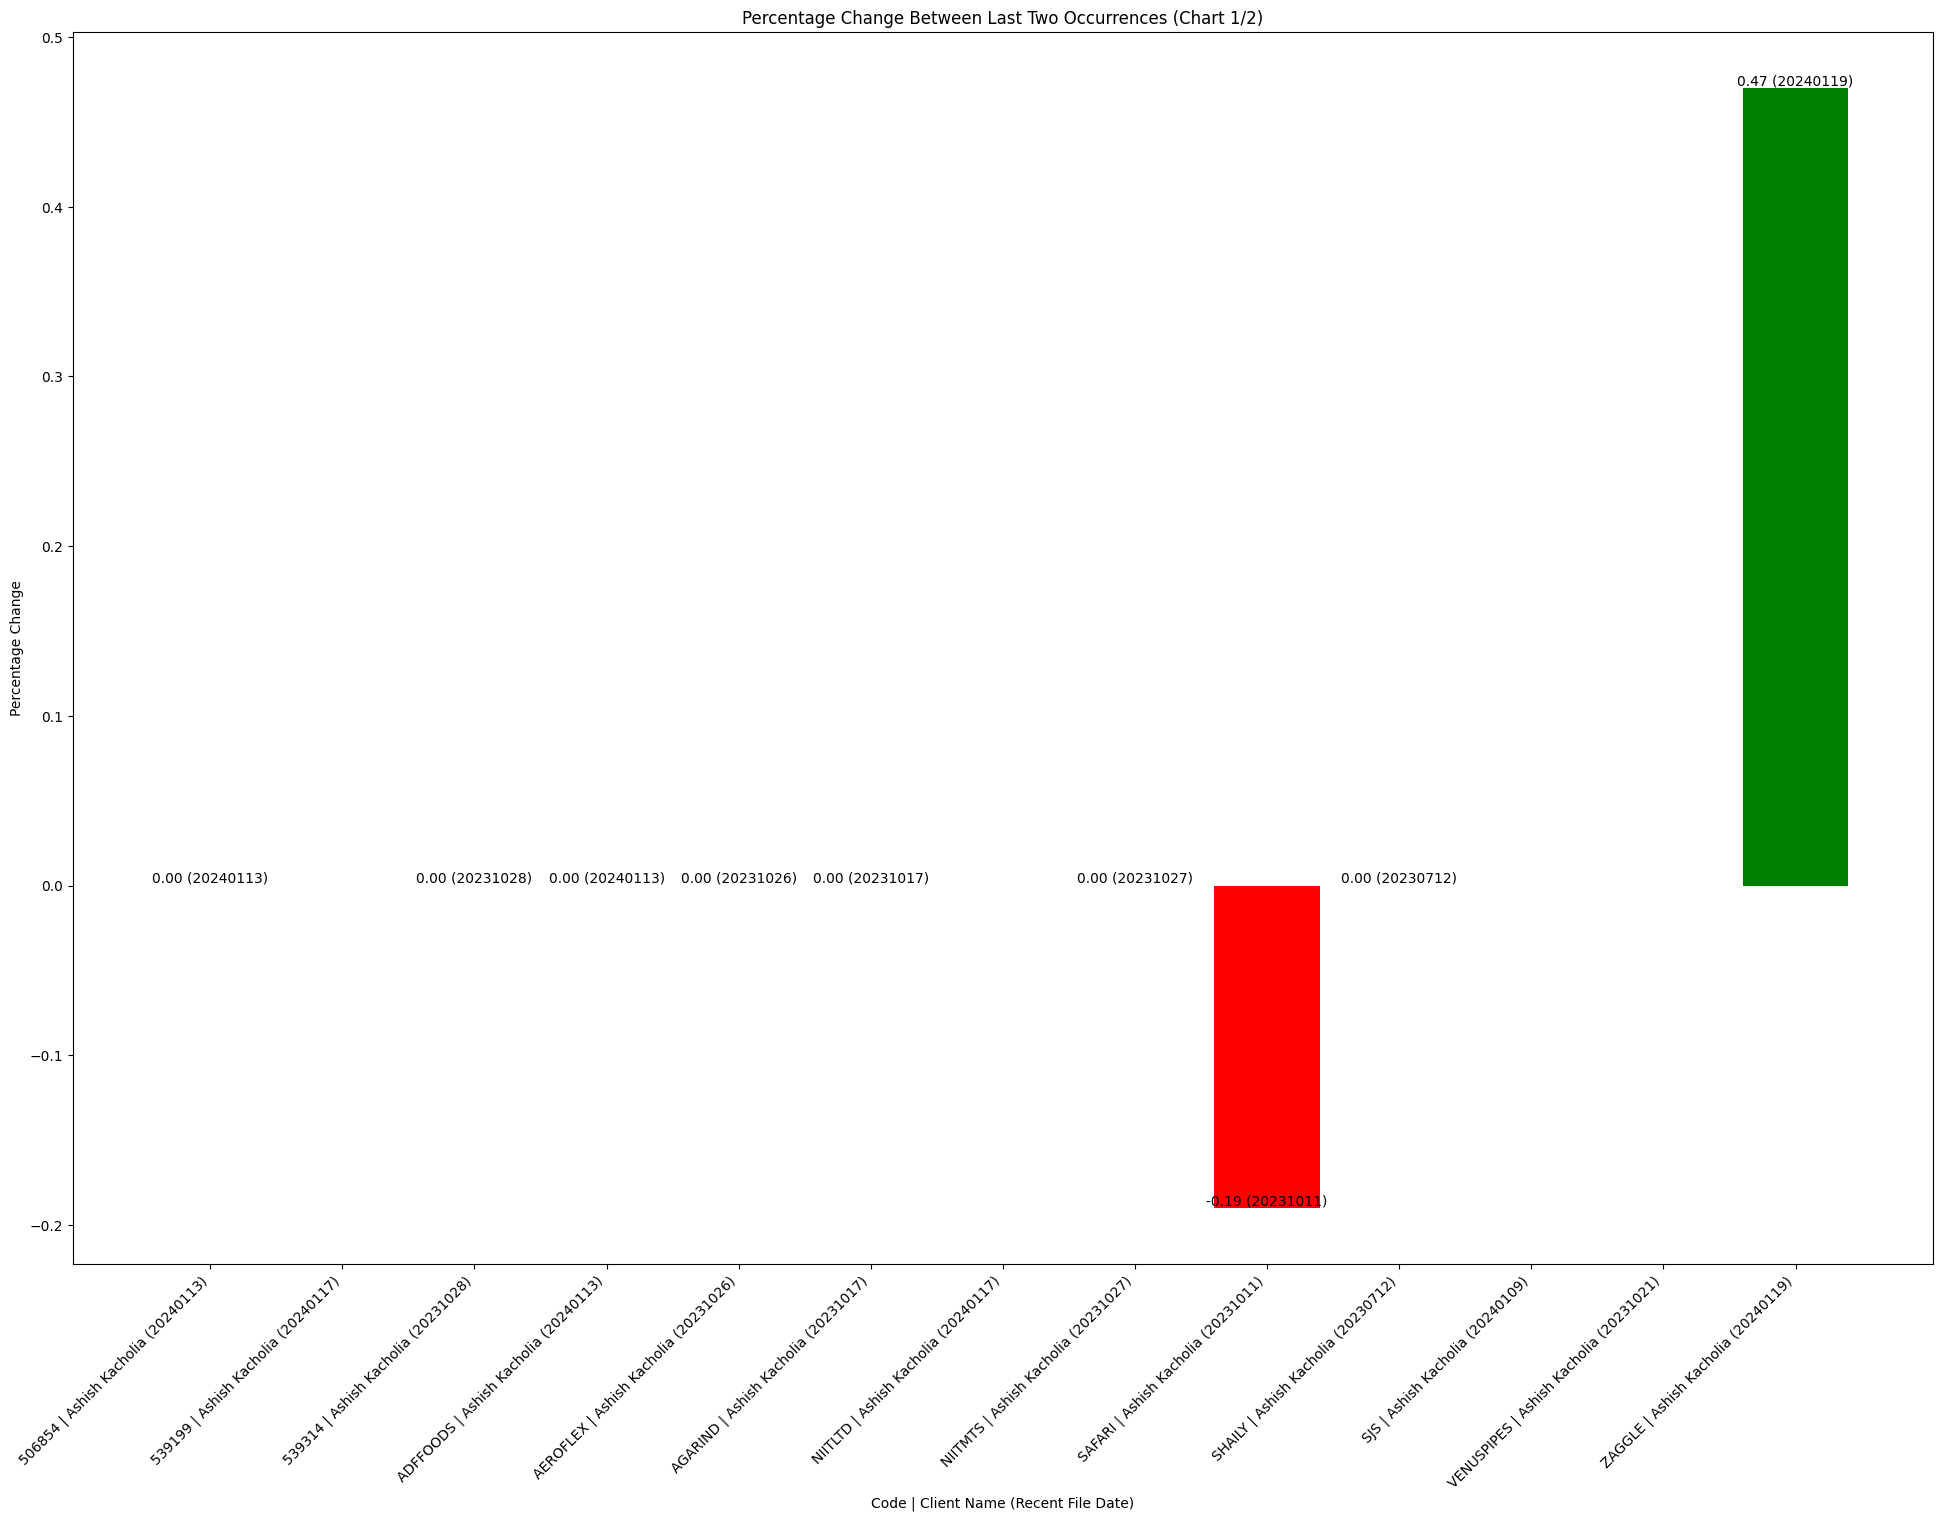

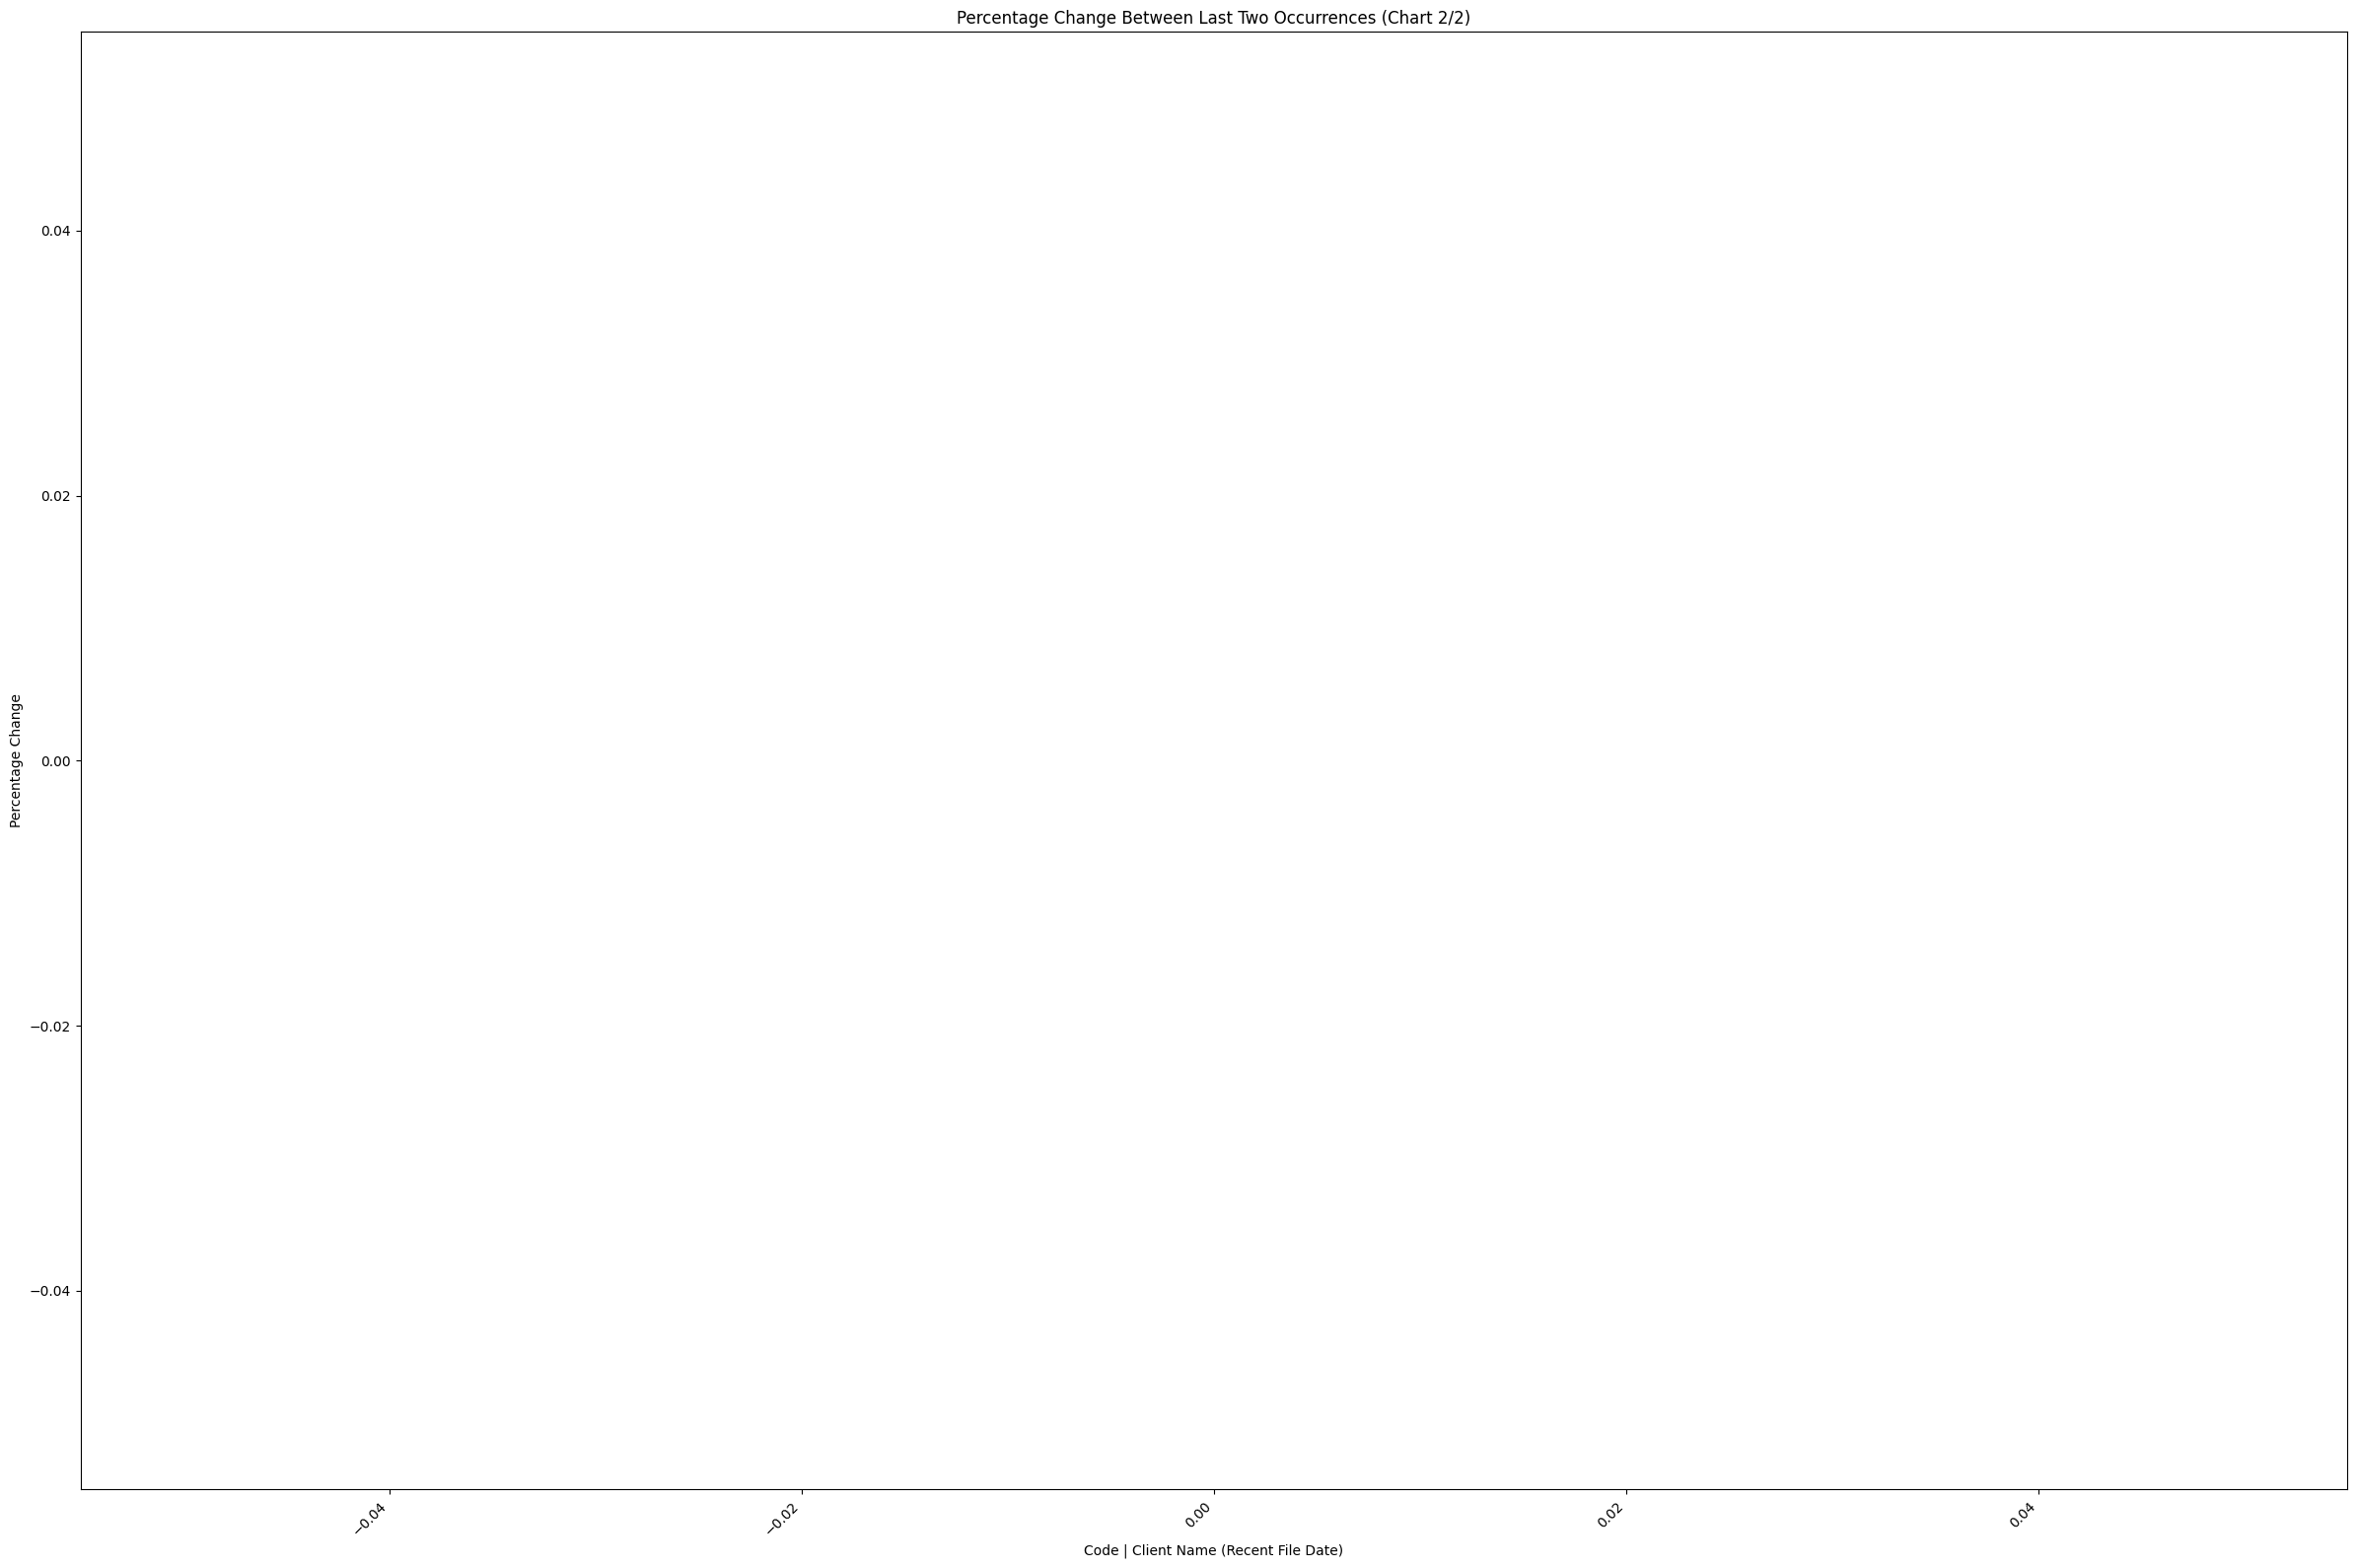

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import re

# Define the path to the CSV file containing 'Client Name'
csv_path = r'C:\Users\91908\Documents\Raja\Share market\Analysis\Trendlyne\Data\Individual_Investor_Data\Individual_Investor_Reconciliation\Individual_Investor_LIST_240130160546.csv'

# Read 'Client Name' from the CSV file
client_name_df = pd.read_csv(csv_path)
client_names = client_name_df['Client Name'].tolist()


# Define the path to the folder containing Excel files
excel_folder_path = r'C:\Users\91908\Documents\Raja\Share market\Analysis\Trendlyne\Data\OutboundSuperstars'

# Create a PrettyTable to store the results
results_table = PrettyTable()
results_table.field_names = ['Code', 'Client Name', 'Holding', 'Percent Holding', 'Investor Type', 'File Date']

# Create a list to store matching rows
matching_rows = []

# Iterate through each Excel file
for excel_file in os.listdir(excel_folder_path):
    excel_file_path = os.path.join(excel_folder_path, excel_file)

    # Get the list of sheet names in the Excel file
    sheet_names = pd.ExcelFile(excel_file_path).sheet_names

    # Check if 'Shareholding' sheet exists
    if 'Shareholding' in sheet_names:
        # Read the 'Shareholding' sheet
        df = pd.read_excel(excel_file_path, sheet_name='Shareholding', skiprows=6)

        # Extract date from the file name using regular expression
        match = re.search(r'\d{8}', excel_file)  # Assuming the date in the file name is in YYYYMMDD format
        if match:
            file_date = match.group(0)
        else:
            file_date = 'Not Found'

        # Check if 'Client Name' is present in the DataFrame
        if 'Client Name' in df.columns:
            # Check if each 'Client Name' from the CSV is present in the Excel file
            present_in_excel = [client_name in df['Client Name'].values for client_name in client_names]

            # Display only the specified columns for matched records
            for i, present in enumerate(present_in_excel):
                if present:
                    matching_row = df[df['Client Name'] == client_names[i]]
                    matching_row = matching_row[['Code', 'Client Name', 'Holding', 'Percent Holding', 'Investor Type']]
                    matching_row['File Date'] = file_date
                    matching_rows.append(matching_row)

# Concatenate all matching rows into a DataFrame
results_df = pd.concat(matching_rows)

# Sort the DataFrame by 'File Date' in descending order
results_df = results_df.sort_values(by='File Date', ascending=False)

# Print the results using PrettyTable
for _, row in results_df.iterrows():
    results_table.add_row(row.tolist())

# Display the PrettyTable
# print(results_table)

# Create a bar chart
plt.figure(figsize=(12, 8))

# Prepare data for the chart
labels = []
percentage_changes = []
recent_file_dates = []

# Iterate over each unique 'Code | Client Name' combination
for (code, client_name), group_df in results_df.groupby(['Code', 'Client Name']):
    # Calculate percentage change between the last two occurrences
    last_two_percentages = group_df['Percent Holding'].tolist()
    if len(last_two_percentages) >= 2:
        percentage_change = last_two_percentages[0] - last_two_percentages[1]

        labels.append(f"{code} | {client_name} ({group_df['File Date'].max()})")
        percentage_changes.append(percentage_change)
        recent_file_dates.append(group_df['File Date'].max())  # Get the recent File Date

bar_count = min(25, len(labels))  # This ensures that bar_count is not greater than the number of labels
total_charts = len(labels) // bar_count + 1

for i in range(total_charts):
    start_index = i * bar_count
    end_index = min((i + 1) * bar_count, len(labels))
    
    current_labels = labels[start_index:end_index]
    current_percentage_changes = percentage_changes[start_index:end_index]
    current_recent_file_dates = recent_file_dates[start_index:end_index]

    # Plot the bar chart
    plt.figure(figsize=(24, 16))
    bars = plt.bar(current_labels, current_percentage_changes, color=['red' if change < 0 else 'green' for change in current_percentage_changes])

    # Add labels and title
    plt.xlabel('Code | Client Name (Recent File Date)')
    plt.ylabel('Percentage Change')
    plt.title(f'Percentage Change Between Last Two Occurrences (Chart {i + 1}/{total_charts})')

    # Display the percentage change values on top of the bars
    for bar, value, recent_date in zip(bars, current_percentage_changes, current_recent_file_dates):
        plt.text(bar.get_x() + bar.get_width() / 2, value, f'{value:.2f} ({recent_date})', ha='center', va='bottom')

    # Rotate x-axis labels at a 45-degree angle
    plt.xticks(rotation=45, ha='right')

# Show all the charts together
plt.tight_layout()
plt.show()


In [ ]:
Individual_Investor_Equity_Shareholding_Pattern

+------------+---------------+----------------+-----------------+---------------+-----------+
|    Code    |  Client Name  |    Holding     | Percent Holding | Investor Type | File Date |
+------------+---------------+----------------+-----------------+---------------+-----------+
|    STAR    | Mukul Agrawal |  Above 1% now  |       1.52      |   Individual  |  20240119 |
|   NUVAMA   | Mukul Agrawal |  Above 1% now  |       1.42      |   Individual  |  20240117 |
| SURYAROSNI | Mukul Agrawal | Sold -0.09000  |       1.38      |   Individual  |  20240116 |
|    PDSL    | Mukul Agrawal | Sold -0.08000  |       2.64      |   Individual  |  20240113 |
|    PDSL    | Mukul Agrawal | Sold -0.08000  |       2.64      |   Individual  |  20240112 |
| IONEXCHANG | Mukul Agrawal | Sold -0.21000  |       1.02      |   Individual  |  20240111 |
| INTELLECT  | Mukul Agrawal | Sold -0.16000  |       1.68      |   Individual  |  20231027 |
| KARURVYSYA | Mukul Agrawal |  Above 1% now  |       1.06  

<Figure size 2400x1600 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


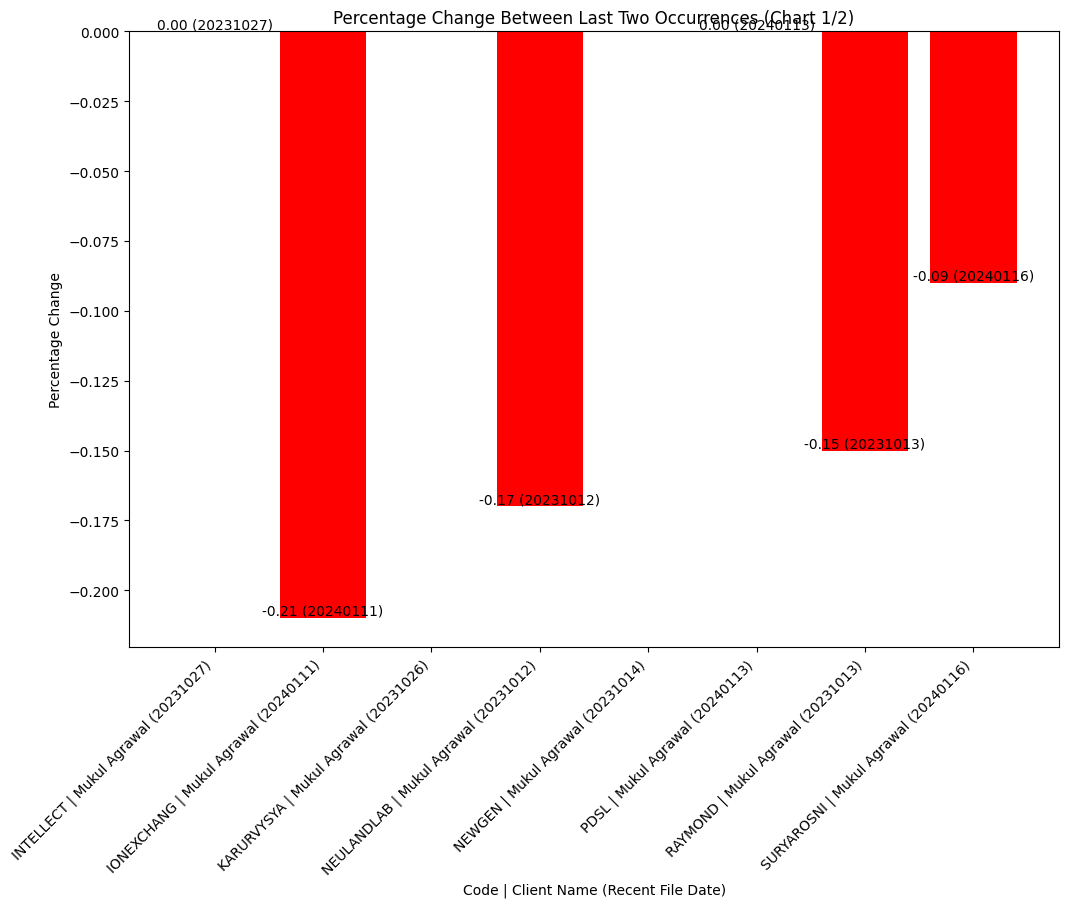

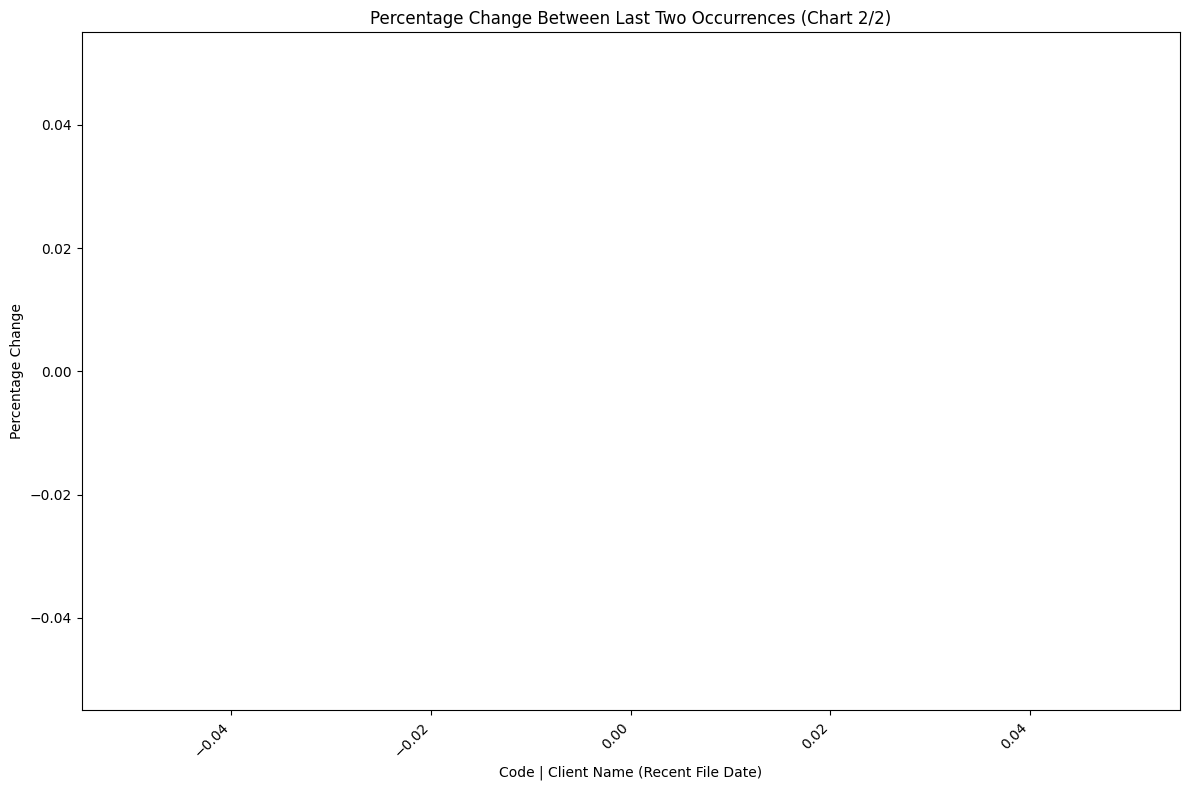

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import re

# Define the path to the CSV file containing 'Client Name'
csv_path = r'C:\Users\91908\Documents\Raja\Share market\Analysis\Trendlyne\Data\Individual_Investor_Data\Individual_Investor_Reconciliation\Individual_Investor_LIST_240130160546.csv'

# Read 'Client Name' from the CSV file
client_name_df = pd.read_csv(csv_path)
client_names = client_name_df['Client Name'].tolist()
codes = client_name_df['Code'].astype(str).apply(lambda x: x.split('.')[0]).tolist()

# Define the path to the folder containing Excel files
excel_folder_path = r'C:\Users\91908\Documents\Raja\Share market\Analysis\Trendlyne\Data\OutboundSuperstars'

# Create a PrettyTable to store the results
results_table = PrettyTable()
results_table.field_names = ['Code', 'Client Name', 'Holding', 'Percent Holding', 'Investor Type', 'File Date']

# Create a list to store matching rows
matching_rows = []

# Iterate through each Excel file
for excel_file in os.listdir(excel_folder_path):
    excel_file_path = os.path.join(excel_folder_path, excel_file)

    # Get the list of sheet names in the Excel file
    sheet_names = pd.ExcelFile(excel_file_path).sheet_names

    # Check if 'Shareholding' sheet exists
    if 'Shareholding' in sheet_names:
        # Read the 'Shareholding' sheet
        df = pd.read_excel(excel_file_path, sheet_name='Shareholding', skiprows=6)

        # Extract date from the file name using regular expression
        match = re.search(r'\d{8}', excel_file)  # Assuming the date in the file name is in YYYYMMDD format
        if match:
            file_date = match.group(0)
        else:
            file_date = 'Not Found'

        # Check if both 'Client Name' and 'Code' are present in the DataFrame
        if 'Client Name' in df.columns and 'Code' in df.columns:
            # Create a mask for rows matching both 'Client Name' and 'Code'
            matching_mask = df['Client Name'].isin(client_names) & df['Code'].isin(codes)

            # Filter the DataFrame based on the mask
            matching_rows_df = df[matching_mask]

            # Display only the specified columns for matched records
            matching_rows_df = matching_rows_df[['Code', 'Client Name', 'Holding', 'Percent Holding', 'Investor Type']]
            matching_rows_df['File Date'] = file_date

            # Append the matching rows to the list
            matching_rows.append(matching_rows_df)

# Concatenate all matching rows into a DataFrame if the list is not empty
if matching_rows:
    results_df = pd.concat(matching_rows)

    # Sort the DataFrame by 'File Date' in descending order
    results_df = results_df.sort_values(by='File Date', ascending=False)

    # Print the results using PrettyTable
    for _, row in results_df.iterrows():
        results_table.add_row(row.tolist())

    # Display the PrettyTable
    print(results_table)

    # Create a bar chart
    plt.figure(figsize=(24, 16))

    # Prepare data for the chart
    labels = []
    percentage_changes = []
    recent_file_dates = []

    # Iterate over each unique 'Code | Client Name' combination
    for (code, client_name), group_df in results_df.groupby(['Code', 'Client Name']):
        # Calculate percentage change between the last two occurrences
        last_two_percentages = group_df['Percent Holding'].tolist()
        if len(last_two_percentages) >= 2:
            percentage_change = last_two_percentages[0] - last_two_percentages[1]

            labels.append(f"{code} | {client_name} ({group_df['File Date'].max()})")
            percentage_changes.append(percentage_change)
            recent_file_dates.append(group_df['File Date'].max())  # Get the recent File Date

    # Ensure that bar_count is not zero
    bar_count = max(1, min(25, len(labels)))

    # Calculate total_charts
    total_charts = len(labels) // bar_count + 1

    for i in range(total_charts):
        start_index = i * bar_count
        end_index = min((i + 1) * bar_count, len(labels))

        current_labels = labels[start_index:end_index]
        current_percentage_changes = percentage_changes[start_index:end_index]
        current_recent_file_dates = recent_file_dates[start_index:end_index]

        # Plot the bar chart
        plt.figure(figsize=(12, 8))
        bars = plt.bar(current_labels, current_percentage_changes, color=['red' if change < 0 else 'green' for change in current_percentage_changes])

        # Add labels and title
        plt.xlabel('Code | Client Name (Recent File Date)')
        plt.ylabel('Percentage Change')
        plt.title(f'Percentage Change Between Last Two Occurrences (Chart {i + 1}/{total_charts})')

        # Display the percentage change values on top of the bars
        for bar, value, recent_date in zip(bars, current_percentage_changes, current_recent_file_dates):
            plt.text(bar.get_x() + bar.get_width() / 2, value, f'{value:.2f} ({recent_date})', ha='center', va='bottom')

        # Rotate x-axis labels at a 45-degree angle
        plt.xticks(rotation=45, ha='right')

    # Show all the charts together
    plt.tight_layout()
    plt.show()
else:
    print("No matching rows found.")
